# Lending Club Case Study

#### Environment Setup

In [1]:
# To get multiple outputs in the same cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Import the EDA required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import plotly.express as px

# Import the generic utility libraries

import os
import random
import datetime as datetime

#Importing the function
from pandas_profiling import ProfileReport

In [3]:
# Set the required global options

# To display all the columns in dataframe
pd.set_option( "display.max_columns", None)
pd.set_option( "display.max_rows", None)

# Setting the display fromat
# pd.set_option('display.float_format', lambda x: '%.2f' % x)

#pd.reset_option('display.float_format')

sns.set(style='whitegrid')

#### Reading the Loan data csv file

In [4]:
# Read the raw csv file 'loan.csv' - containing the basic data of the loans
# encoding - The type of encoding format needs to be used for data reading

loan_df = pd.read_csv('loan.csv', low_memory=False)

In [5]:
# Displaying random records from the dataframe

loan_df.sample(3)

# print(loan.head(3))
# print(loan.tail(3))

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
12980,788920,992723,4200,4200,4200.000000,36 months,11.99%,139.49,B,B5,Guilford County Schools,4 years,MORTGAGE,48000.0,Source Verified,Jun-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 06/16/11 > I am looking to...,credit_card,Consolidate Credit Card Debt,274xx,NC,20.40,0,Jan-99,1,46.0,NaN,15,0,10256,59.40%,50,f,0.0,0.0,5021.21111,5021.21,4200.0,821.21,0.0,0.0,0.0,Jul-14,140.32,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
27063,558089,718468,8000,8000,7840.202957,60 months,11.49%,175.91,B,B4,Cedar Creek Inn,8 years,RENT,26400.0,Source Verified,Aug-10,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 08/04/10 > I am a responsi...,debt_consolidation,My CCK Loan,928xx,CA,19.50,1,Feb-01,3,8.0,NaN,10,0,2288,13.10%,15,f,0.0,0.0,10553.86000,10321.97,8000.0,2553.86,0.0,0.0,0.0,Aug-15,208.54,NaN,Aug-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
37684,374401,395500,10000,10000,8841.852872,36 months,9.32%,319.47,A,A4,Mark's Bookkeeping Services,4 years,RENT,50000.0,Source Verified,Jan-09,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,"In the near future, I will buy an apartment an...",other,Emergency fund loan,113xx,NY,0.36,0,Aug-00,2,NaN,NaN,12,0,311,0.50%,16,f,0.0,0.0,11097.81886,9811.30,10000.0,1097.82,0.0,0.0,0.0,Aug-10,5686.12,NaN,Apr-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### The random observations are looked upon to understand variables and it's possible values.
Post this, we will initiate data cleaning.

# Data Cleaning

#### Conclusion from the First Impression of data
1. Many variables with missing/null values.
        Action - Calculate the missing % and would be dropped if it is too high.
2. Few variables have values which are prefixed or suffixed with 'months','%','>','<' symbols.
        Action - Such variables need to be cleaned to remove consistent prefix or suffix.
3. Variables like 'desc', 'purpose' and 'title' contains redundant information.
        Action - Except one, others can be dropped.


#### Get the precise Insights
The first go-to step should be to basic info of dataframe and of each variable like:

For Numeric & Non-numeric variables:

    1. total records count
    2. non-null records count
    3. null records count and it's percentage(%)
<br>
For object(non-numeric) variables:

    4. unique records count and it's percentage(%)
    5. top values
    6. frequency
<br>
For Numeric variables:

    7. mean
    8. median
    9. mode
    10. standard deviation
    11. Quantiles
    12. minimum & maximum values


Below is a *USER-DEFINED* function to get all the above mentioned basic info

In [6]:
# Creating a User-Defined function to get the additional info on describe()

def df_stats(df,dt_flg):
    '''This function replicates the df.describe() with few additional features
        1. total_count
        2. null_count
        3. duplicate_with_null_count
        4. Renaming the existing columns
        Parameter:
        1. df - DataFrame name
        2. dt_flg - Flag to indicate the datatype of the columns in dataframe
            Possible values are:
                0 - All numeric
                1 - All non-numeric or object
                2 - Both Numeric and Object columns
    '''
    
    if dt_flg == 0:
        contents = df.describe().T.reset_index()
        contents.rename(columns={'index':'col_name','count':'non_null_count'}, inplace=True)
        contents['total_count'] = len(df.index)
        contents['non_null_count'] = contents['non_null_count'].astype('int')
        contents['null_count'] = contents['total_count'] - contents['non_null_count']
        contents['null%'] = np.round(contents['null_count']/contents['total_count']*100,2)
        columns = ['col_name','total_count','non_null_count','null_count','mean','std','min','25%','50%','75%','max']
        contents = contents[columns].infer_objects()
    elif dt_flg == 1:
        contents = df.describe().T.reset_index()
        contents.rename(columns={'index':'col_name','count':'non_null_count','unique':'unique_wo_null_count'}, inplace=True)
        contents['total_count'] = len(df.index)
        contents['non_null_count'] = contents['non_null_count'].astype('int')
        contents['unique_wo_null_count'] = contents['unique_wo_null_count'].astype('float')
        contents['null_count'] = contents['total_count'] - contents['non_null_count']
        contents['null%'] = np.round(contents['null_count']/contents['total_count']*100,2)
        contents['unique%'] = np.round(contents['unique_wo_null_count']/contents['non_null_count']*100,2)
        contents['duplicate_wo_null_count'] = contents['non_null_count'] - contents['unique_wo_null_count']
        columns = ['col_name','total_count','non_null_count','null_count','null%','unique_wo_null_count','unique%','duplicate_wo_null_count','top','freq']
        contents = contents[columns].infer_objects()
    elif dt_flg == 2:
        contents = df.describe(include='all').T.reset_index()
        contents.rename(columns={'index':'col_name','count':'non_null_count','unique':'unique_wo_null_count'}, inplace=True)
        contents['total_count'] = len(df.index)
        contents['non_null_count'] = contents['non_null_count'].astype('int')
        contents['unique_wo_null_count'] = contents['unique_wo_null_count'].astype('float')
        contents['null_count'] = contents['total_count'] - contents['non_null_count']
        contents['null%'] = np.round(contents['null_count']/contents['total_count']*100,2)
        contents['unique%'] = np.round(contents['unique_wo_null_count']/contents['non_null_count']*100,2)
        contents['duplicate_wo_null_count'] = contents['non_null_count'] - contents['unique_wo_null_count']
        columns = ['col_name','total_count','non_null_count','null_count','null%','unique_wo_null_count','unique%','duplicate_wo_null_count','mean','std','min','25%','50%','75%','max','top','freq']
        contents = contents[columns].infer_objects()
    return contents

In [7]:
# Using the user-defined function - df_stats() to get the descriptive stats

loan_stats = df_stats(loan_df,2)
loan_stats

,col_name,total_count,non_null_count,null_count,null%,unique_wo_null_count,unique%,duplicate_wo_null_count,mean,std,min,25%,50%,75%,max,top,freq
0,id,39717,39717,0,0.00,NaN,NaN,NaN,683131.913060,210694.132915,54734.00,516221.00,665665.000000,8.377550e+05,1.077501e+06,NaN,NaN
1,member_id,39717,39717,0,0.00,NaN,NaN,NaN,850463.559408,265678.307421,70699.00,666780.00,850812.000000,1.047339e+06,1.314167e+06,NaN,NaN
2,loan_amnt,39717,39717,0,0.00,NaN,NaN,NaN,11219.443815,7456.670694,500.00,5500.00,10000.000000,1.500000e+04,3.500000e+04,NaN,NaN
3,funded_amnt,39717,39717,0,0.00,NaN,NaN,NaN,10947.713196,7187.238670,500.00,5400.00,9600.000000,1.500000e+04,3.500000e+04,NaN,NaN
4,funded_amnt_inv,39717,39717,0,0.00,NaN,NaN,NaN,10397.448868,7128.450439,0.00,5000.00,8975.000000,1.440000e+04,3.500000e+04,NaN,NaN
5,term,39717,39717,0,0.00,2.0,0.01,39715.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36 months,29096.0
6,int_rate,39717,39717,0,0.00,371.0,0.93,39346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.99%,956.0
7,installment,39717,39717,0,0.00,NaN,NaN,NaN,324.561922,208.874874,15.69,167.02,280.220000,4.307800e+02,1.305190e+03,NaN,NaN
8,grade,39717,39717,0,0.00,7.0,0.02,39710.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,12020.0
9,sub_grade,39717,39717,0,0.00,35.0,0.09,39682.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B3,2917.0


In [8]:
#Generate the profiling report

#profile = ProfileReport(loan)
#profile = ProfileReport(loan.sample(1000), title = 'Loan - Pandas Profiling Report', explorative=True)
#profile = ProfileReport(loan_df, title = 'Loan - Pandas Profiling Report', minimal=True)

# save to file

#profile.to_file('loan_profile_report.html')

#profile.to_widgets()
#profile.to_notebook_iframe()

#### Handling the missing data - 1

In [9]:
# Calculate the % of missing/null values

miss_pct = round(loan_df.isna().sum() * 100/len(loan_df),2)
miss_pct[miss_pct > 0]

emp_title                           6.19
emp_length                          2.71
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

In [10]:
# Filtering the variables with missing % greater than equal to 90

miss_gt_90 = miss_pct[miss_pct >= 90]

len(miss_gt_90)

#miss_gt_90

56

There are 56 variables with minimum 90% of missing values.

Creating a list of these 56 columns to drop them from the dataframe.

In [11]:
miss_gt_90_cols = miss_gt_90.index
miss_gt_90_cols

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

#### Dropping these 56 variables and storing the result in a new dataframe

In [12]:
# A new dataframe 'loan' is created without the 56 variables

loan = loan_df.drop(miss_gt_90_cols, axis=1).copy(deep=True)

In [13]:
loan.shape

(39717, 55)

After removing these columns, 55 columns remain.
<br> There are few more variables with missing values, which will be handled again at later point in time.

In [14]:
loan.sample(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
8766,860856,1073722,5000,5000,5000.00000,36 months,18.79%,182.75,E,E3,Citi cards,10+ years,MORTGAGE,45000.0,Source Verified,Aug-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,need help,751xx,TX,11.52,0,Sep-98,3,NaN,6,0,5276,99.50%,10,f,0.0,0.0,3269.02000,3269.02,2011.13,1087.12,0.0,170.77,1.9,Feb-13,182.75,Oct-15,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
39367,217788,215783,9300,9300,1298.39000,36 months,11.72%,307.66,C,C4,Washington State Employment Security,3 years,RENT,62000.0,Not Verified,Jan-08,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,I'd like to pay off some high interest credit ...,credit_card,Personal Loan~Pay off high interest cc's,985xx,WA,20.09,0,Jul-90,0,34.0,15,0,16890,64%,29,f,0.0,0.0,11075.35780,1501.40,9299.99,1775.37,0.0,0.00,0.0,Jan-11,310.73,Feb-13,0.0,1,INDIVIDUAL,0,0.0,0,NaN,0.0
34246,454405,562673,22000,22000,21968.61329,36 months,20.86%,827.33,G,G4,Lake County High Schools Technology Camp,< 1 year,OWN,135000.0,Not Verified,Nov-09,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,562673 added on 10/26/09 > I will consolidat...,debt_consolidation,COnsolidate and Breathe,600xx,IL,12.78,0,Dec-81,2,55.0,44,0,62553,44.20%,65,f,0.0,0.0,29784.16746,29730.59,21999.99,7784.17,0.0,0.00,0.0,Nov-12,832.17,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


#### On looking the data, we find that variable term should be a numerical variable and the unnecessary suffix should be removed

In [15]:
# Looking the values of variable term

loan['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [16]:
# Cleaning variable term by removing 'months' suffix

loan['term'] = [x.strip().split(' ')[0] for x in loan.term]

In [17]:
# Changing the datatype for term as it contains numerical values

loan['term'] = loan['term'].astype('int')

In [18]:
# Re-Looking the values of variable term ater cleaning

loan['term'].unique()

array([36, 60])

The variable term looks good and has 2 numerical values

In [19]:
# Another way

#loan['term'] = loan['term'].str.strip().str.split(' ').str[0]

#### On looking the data, we find that variable int_rate should be a numerical variable and the unnecessary suffix '%' should be removed

In [20]:
# Cleaning variable int_rate by removing '%' suffix

loan['int_rate'] = [x.strip('%') for x in loan.int_rate]

In [21]:
# Changing the datatype for int_rate as it contains numerical values

loan['int_rate'] = loan['int_rate'].astype('float')

In [22]:
# Re-Looking the first 5 values of int_rate after cleaning

loan['int_rate'].unique()[:5]

array([10.65, 15.27, 15.96, 13.49, 12.69])

The variable int_rate looks good and has numerical values

#### On looking the data, we find that variable emp_length should be a numerical variable and the unnecessary suffix 'years' should be removed

In [23]:
# Looking the possible values of emp_length

loan['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [24]:
# Standardising the emp_length as per the business : for < 1 year the emp_length should be 0, and 10 for 10+ years of experience

loan.loc[loan['emp_length'] == '< 1 year', 'emp_length'] = '0'

In [25]:
# Cleaning variable emp_length by keeping only digits

loan['emp_length'] = loan['emp_length'].str.extract(r'(\d*)')

In [26]:
# Changing the datatype for emp_length as it contains numerical values

loan['emp_length'] = loan['emp_length'].astype('float')

In [27]:
# Re-Looking the values of emp_length after cleaning

loan['emp_length'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

The variable emp_length looks good and has numerical values

#### On looking the data, we find that variable revol_util should be a numerical variable and the unnecessary suffix '%' should be removed

In [28]:
# Looking the first 5 values of revol_util

loan['revol_util'].unique()[:5]

array(['83.70%', '9.40%', '98.50%', '21%', '53.90%'], dtype=object)

In [29]:
# Cleaning variable revol_util by removing '%' suffix

loan['revol_util'] = loan['revol_util'].str.strip('%')

In [30]:
# Changing the datatype for emp_length as it contains numerical values

loan['revol_util'] = loan['revol_util'].astype('float')

In [31]:
# Looking the first 5 values of revol_util

loan['revol_util'].unique()[:5]

array([83.7,  9.4, 98.5, 21. , 53.9])

The variable revol_util looks good and has numerical values

#### Changing date indicator variables to datetime type

In [32]:
def str_to_dt(dt_varlist):
    for var in dt_varlist:
        loan[var] = pd.to_datetime(loan[var], format='%b-%y')

In [33]:
# List of date columns

dt_varlist = ['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']

# Calling the str_to_dt function
str_to_dt(dt_varlist)

In [34]:
loan[dt_varlist].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   issue_d             39717 non-null  datetime64[ns]
 1   earliest_cr_line    39717 non-null  datetime64[ns]
 2   last_pymnt_d        39646 non-null  datetime64[ns]
 3   last_credit_pull_d  39715 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.2 MB


In [35]:
loan.sample(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1652,1047534,1278623,20000,20000,19950.0,60,14.27,468.17,C,C2,Geller & Company LLC,5.0,RENT,83000.0,Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/01/11 > Loan will be us...,debt_consolidation,Debt consolidate five year term,113xx,NY,10.08,0,1998-12-01,0,NaN,5,0,20443,81.8,11,f,0.0,0.0,23266.611870,23208.45,20000.0,3266.61,0.0,0.0,0.0,2013-03-01,16727.61,2016-04-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
27629,550257,709293,6625,6625,6575.0,36,10.38,214.96,B,B1,Metropolitan Opera,4.0,RENT,51000.0,Source Verified,2010-07-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Credit Card Consolidation,112xx,NY,6.19,0,1997-06-01,0,NaN,4,0,5400,65.9,18,f,0.0,0.0,7525.775342,7468.98,6625.0,900.78,0.0,0.0,0.0,2012-05-01,3230.69,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
13664,771744,973546,11000,11000,10975.0,36,15.62,384.67,D,D1,RQ Construction,2.0,RENT,58000.0,Source Verified,2011-06-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 06/06/11 > I will be using...,debt_consolidation,Credit Consolidation,919xx,CA,24.89,0,2001-11-01,0,NaN,5,0,17765,97.6,21,f,0.0,0.0,13847.976910,13816.50,11000.0,2847.98,0.0,0.0,0.0,2014-07-01,416.08,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


The objective is to **identify predictor variables of default** so that at the time of loan application, those variables would help to approve or reject the application.

The **customer behaviour variables** i.e, those which are **generated after the loan is approved** are not available  at the point of application and thus should be removed from the analysis dataframe. Such variables **cannot be the predictor variables.**

Also there are few variables with which have either random, constant or fully unique values which would not contribute to the analysis.

Such variables should be removed.

These variables are:
1. __id__ : is not available at the time of application. Also a random number given to the loan. Hence can be removed.
2. __member_id__ : is not available at the time of application. Also a random number given to the member. Hence can be removed.
3. __pymnt_plan__: has value for entire dataset as 'n'. Hence can be removed.
4. __url__: is a URL for LC page for corresponding to each memberid. Hence can be removed.
5. __zip_code__: first 3 digits of the 5 digit zip code are visible, also is redundant with addr_state. Hence can be removed.
6. __initial_list_status__: has value for entire dataset as 'f' out of all the possible values. Hence can be removed.
7. __policy_code__: has value for entire dataset as '1', indicating that all are publicly available. Hence can be removed.
8. __application_type__: has value for entire dataset as 'INDIVIDUAL', indicating that all are individual applications not joint. Hence can be removed.
9. __acc_now_delinq__: has value for entire dataset is '0', therefore can be removed.
10. __delinq_amnt__:  has value for entire dataset is '0', therefore can be removed.
11. __funded_amnt__: has value for this column as almost equivalent to loan_amnt. Hence removing to avoid Multicollinearity.
12. __funded_amnt_inv__: has value for this column as almost equivalent to funded_amnt. Hence removing to avoid Multicollinearity. Also this wont be available at the time of decision making of funding a loan.
13. __title__: has value for this column as almost equivalent to purpose. Hence removing to avoid redundancy.
14. __desc__: has value for this column as almost equivalent to purpose. Hence removing to avoid redundancy.

Some customer behaviour variables:

15. __total_pymnt__ : is not available at the time of application.
16. __total_pymnt_inv__ : is not available at the time of application.
17. __total_rec_prncp__ : is not available at the time of application.
18. __total_rec_int__ : is not available at the time of application.
19. __total_rec_late_fee__ : is not available at the time of application.
20. __recoveries__ : is not available at the time of application.
21. __collection_recovery_fee__ : is not available at the time of application.
22. __last_pymnt_d__ : is not available at the time of application.
23. __last_pymnt_amnt__ : is not available at the time of application.

These 23 variables are dropped now.

In [36]:
loan.shape

(39717, 55)

In [37]:
loan.delinq_amnt.unique()

array([0], dtype=int64)

delinq_amnt will be dropped since it has only 0.

In [38]:
columns_to_drop = ['id','member_id','pymnt_plan','url','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt','funded_amnt','funded_amnt_inv','title','desc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt']
loan = loan.drop(columns_to_drop,axis=1)

In [39]:
loan.shape

(39717, 30)

The dataframe has now 30 variables and 39717 records.

#### Handling the missing variables - 2

Let's examine more for the missing values.

In [40]:
miss_ser = round(loan.isna().sum() * 100/len(loan),2).sort_values(ascending=False)
miss_ser[miss_ser > 0]

mths_since_last_delinq        64.66
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
chargeoff_within_12_mths       0.14
collections_12_mths_ex_med     0.14
revol_util                     0.13
tax_liens                      0.10
last_credit_pull_d             0.01
dtype: float64

The variables emp_title, emp_length have 6.19% and 2.71% missing value. These columns have information about the borrower like their job title and their employment length in years, which are important attributes. We ll remove the rows with nan/blank values for these varaibles.

In [41]:
loan = loan[~loan.emp_title.isnull()]
loan = loan[~loan.emp_length.isnull()]

In [42]:
loan.shape

(37202, 30)

In [43]:
miss_ser = round(loan.isna().sum() * 100/len(loan),2).sort_values(ascending=False)
miss_ser[miss_ser > 0]

mths_since_last_delinq        64.56
pub_rec_bankruptcies           1.76
chargeoff_within_12_mths       0.13
collections_12_mths_ex_med     0.13
revol_util                     0.12
tax_liens                      0.09
dtype: float64

In [44]:
loan.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [45]:
loan.chargeoff_within_12_mths.unique()

array([ 0., nan])

Can be dropped as it has either 0 or NaN

In [46]:
loan.collections_12_mths_ex_med.unique()

array([ 0., nan])

Can be dropped as it has either 0 or NaN

In [47]:
loan.tax_liens.unique()

array([ 0., nan])

Can be dropped as it has either 0 or NaN

In [48]:
loan.drop(['chargeoff_within_12_mths','collections_12_mths_ex_med','tax_liens'], axis=1, inplace=True)

In [49]:
loan.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [50]:
miss_ser = round(loan.isna().sum() * 100/len(loan),2).sort_values(ascending=False)
miss_ser[miss_ser > 0]

mths_since_last_delinq    64.56
pub_rec_bankruptcies       1.76
revol_util                 0.12
dtype: float64

In [51]:
loan.drop(['mths_since_last_delinq'], axis=1, inplace=True)

In [52]:
# Removing the records with missing values in pub_rec_bankruptcies

loan[loan.pub_rec_bankruptcies.isna()].index
loan.drop(loan[loan.pub_rec_bankruptcies.isna()].index, inplace=True)

# Checking the shape of df
loan.shape

# Removing the records with missing values in revol_util
loan[loan.revol_util.isna()].index
loan.drop(loan[loan.revol_util.isna()].index, inplace=True)

# Checking the shape of df
loan.shape

Int64Index([35362, 38443, 38728, 38876, 38971, 39004, 39005, 39006, 39007,
            39008,
            ...
            39703, 39705, 39707, 39708, 39709, 39710, 39711, 39712, 39713,
            39716],
           dtype='int64', length=654)

(36548, 26)

Int64Index([ 3565,  4943, 12042, 12147, 13891, 17985, 21604, 24663, 24738,
            25261, 25977, 26649, 26724, 26813, 28170, 28685, 28938, 28986,
            29236, 29248, 31862, 31939, 32715, 33078, 33490, 33534, 34268,
            34849, 35851, 36209, 36473, 36859, 37042, 37268, 37540, 37709,
            37757, 37778, 37911, 38201, 38457, 38524, 38899, 38917, 38949,
            38970],
           dtype='int64')

(36502, 26)

#### The objective is to identify predictor variables of default so that at the time of loan application, those variables would help to approve or reject the application.

The ones with 'Current' value are neither Fully-paid or Defaulted. So removing these records from loan dataframe

In [53]:
loan.loan_status.unique()

array(['Charged Off', 'Fully Paid', 'Current'], dtype=object)

In [54]:
loan = loan.loc[loan['loan_status'] != 'Current']

In [55]:
loan.shape

(35436, 26)

In [56]:
loan.loan_status.unique()

array(['Charged Off', 'Fully Paid'], dtype=object)

---

# Data Analysis

---

In [57]:
loan_df = loan.copy()

In [58]:
loan_df.sample(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies
29601,19750,60,7.88,247.18,A,A5,Stop&Shop Distribution LLC,5.0,RENT,45000.0,Not Verified,2010-06-01,Fully Paid,house,MA,23.44,0,1996-12-01,1,6,0,10111,37.1,16,2015-10-01,0.0
2851,16000,36,12.42,534.65,B,B4,Alliance Healthcare Information,4.0,MORTGAGE,75000.0,Not Verified,2011-11-01,Fully Paid,debt_consolidation,PA,14.67,0,1975-12-01,2,11,0,13288,58.5,35,2012-07-01,0.0
29798,25000,60,12.73,415.56,C,C1,NEW YORK CITY POLICE DEPT,10.0,MORTGAGE,114000.0,Source Verified,2010-05-01,Fully Paid,home_improvement,NY,0.74,0,1986-11-01,2,6,0,2296,38.3,29,2015-04-01,0.0


### in_default_flg - a business driven metric is created for the target variable 'loan_status'

0 - Not Default or Fully Paid <br>
1 - Defaulter

In [59]:
loan_df['in_default_flg'] = [0 if x == 'Fully Paid' else 1 for x in loan_df['loan_status']]
loan_df.sample(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies,in_default_flg
27596,6250,36,15.95,219.58,D,D4,Philadelphia Arts in Education Partnersh,8.0,MORTGAGE,40999.92,Source Verified,2010-07-01,Fully Paid,wedding,NJ,12.44,0,1998-12-01,0,5,0,6294,99.9,8,2015-08-01,0.0,0
20702,25000,36,17.88,902.31,E,E5,"Cornerstone Advisors, Inc.",3.0,MORTGAGE,330000.00,Verified,2011-01-01,Fully Paid,debt_consolidation,SC,17.04,0,1993-03-01,0,11,0,79576,99.5,34,2016-05-01,0.0,0
25181,10000,60,13.61,230.67,C,C2,The City College of New York,2.0,MORTGAGE,71073.00,Source Verified,2010-09-01,Fully Paid,home_improvement,NY,13.95,0,1999-03-01,3,10,0,3945,58.0,13,2013-11-01,0.0,0


In [60]:
loan_df.in_default_flg.unique()

array([1, 0], dtype=int64)

In [61]:
loan_df.in_default_flg.value_counts()

0    30432
1     5004
Name: in_default_flg, dtype: int64

In [62]:
df1 = loan_df.groupby('in_default_flg')['loan_amnt'].sum().to_frame().reset_index()
df1['loan_amnt_pct'] = (df1['loan_amnt']/loan_df.loan_amnt.sum()*100).round(2)
df1

,in_default_flg,loan_amnt,loan_amnt_pct
0,0,333078875,84.46
1,1,61276975,15.54


In [63]:
#loan_df.groupby('in_default_flg')['loan_amnt'].sum().plot.bar();

In [64]:
# df2 = loan_df.groupby('in_default_flg').size()/len(loan_df)*100
# df3 = df2.to_frame().reset_index()
# df3.rename(columns= {df3.columns[1] : 'count_pct'}, inplace=True)
# df3['count_pct'] = df3['count_pct'].round(2)
# df3
# #df3['count'] = df3['count'].apply(lambda x: round(x, 2))

The above way is commented as it creates only count_pct.<br>
The below method creates count as well count_pct.

In [65]:
df2 = loan_df.groupby('in_default_flg').size().to_frame().reset_index()
df2.rename(columns= {df2.columns[1] : 'count'}, inplace=True)
df2['count_pct'] = (df2['count']/len(loan_df)*100).round(2)
df2
#df3['count'] = df3['count'].apply(lambda x: round(x, 2))

,in_default_flg,count,count_pct
0,0,30432,85.88
1,1,5004,14.12


In [66]:

## Show labels in bar plots - copied from https://stackoverflow.com/a/48372659
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}".format(y_value)
        else:
            try:
                label = "{:.1f}".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [67]:
# plt.figure(figsize=(5,7))
# ax = loan_df.groupby('in_default_flg').loan_amnt.count().plot.bar();
# showLabels(ax);
# ax.set_ylabel('Count', fontweight ='bold')
# ax.set_xlabel('In_Default_Flg', fontweight ='bold') 
# ax.grid(True);
# ax.set_title('Count by in_default_flg', fontsize = 19, fontweight ='bold');

ValueError: Could not interpret input 'loan_status'

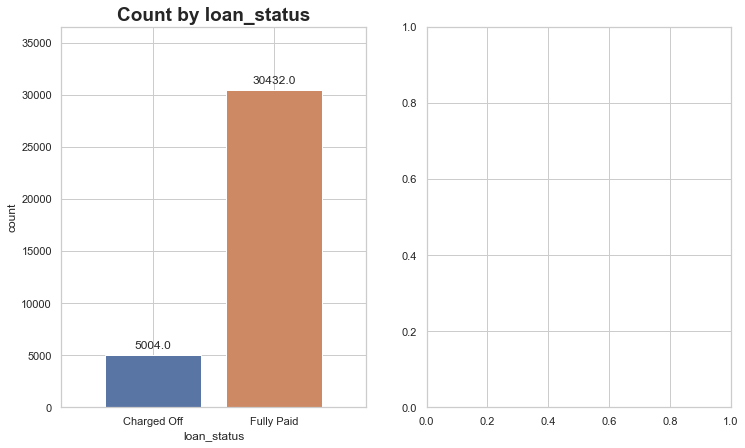

In [121]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
ax = sns.countplot(x="loan_status", data=loan_df);
showLabels(ax);
#ax.set_xlabel('Display X-axis Label', fontweight ='bold')
#ax.set_ylabel('Display X-axis Label', fontweight ='bold') 
ax.grid(True);
ax.set_title('Count by loan_status', fontsize = 19, fontweight ='bold');


plt.subplot(1,2,2)
ax = sns.barplot(x="loan_status", y= 'count_pct', data=df2);
showLabels(ax);
#ax.set_xlabel('Display X-axis Label', fontweight ='bold')
#ax.set_ylabel('Display X-axis Label', fontweight ='bold') 
ax.grid(True);
ax.set_title('Count % by loan_status', fontsize = 19, fontweight ='bold');

---
Approximately **14%** of loans in the dataset are **defaulted.**
<br>Any variable that increases percentage of default to higher than 16.5% should be considered a business risk. 
(16.5 is 18% higher than 13.97 - a large enough increase) 

---

In [69]:
# plt.figure(figsize=(5,7))
# ax = sns.barplot(x="in_default_flg", y= 'loan_amnt', data=loan_df, estimator=lambda x: len(x) / len(loan_df) * 100)
# showLabels(ax);
# #ax.set_xlabel('Display X-axis Label', fontweight ='bold')
# #ax.set_ylabel('Display X-axis Label', fontweight ='bold') 
# ax.grid(True);
# ax.set_title('Count % by in_default_flg', fontsize = 19, fontweight ='bold');

# Univariate Analysis - Categorical Features

In [70]:
# def default_rate_per_var(var, df = loan_df, sort_flg=True, head=0):
    
#     plt.subplot(1, 2, 1)
#     if head == 0:
#         ser = (loan_df[var].value_counts(normalize=True)*100)
#     else:
#         ser = (loan_df[var].value_counts(normalize=True).head(head)*100)
#     #ser
#     if sort_flg:
#         ser = ser.sort_index()
#     ax = ser.plot.bar(color=sns.color_palette("Paired", 10))
#     ax.set_ylabel('% count in data', fontsize=16)
#     ax.set_xlabel(var, fontsize=12)
#     showLabels(ax)
#     plt.subplot(1, 2, 2)
#     if head == 0:
#         ser = (loan_df.loc[loan_df['in_default_flg'] == 1][var].value_counts(normalize=True)*100)
#     else:
#         ser = (loan_df.loc[loan_df['in_default_flg'] == 1][var].value_counts(normalize=True).head(head)*100)
#     #ser
#     if sort_flg:
#         ser = ser.sort_index()
#     ax = ser.plot.bar(color=sns.color_palette("Paired", 10))
#     ax.set_ylabel('% of Defaulted loans', fontsize=16)
#     ax.set_xlabel(var, fontsize=12)
#     showLabels(ax)

In [71]:
def default_rate_per_var(var, df = loan_df, sort_flg=True, head=0):
    
    plt.subplot(1, 2, 1)
    if head == 0:
        ser = (df[var].value_counts(normalize=True)*100)
    else:
        ser = (df[var].value_counts(normalize=True).head(head)*100)
    #ser
    if sort_flg:
        ser = ser.sort_index()
    ax = ser.plot.bar(color=sns.color_palette("Paired", 10))
    ax.set_ylabel('% count in data', fontsize=16)
    ax.set_xlabel(var, fontsize=12)
    showLabels(ax)
    plt.subplot(1, 2, 2)
    if head == 0:
        ser = (df.loc[df['in_default_flg'] == 1][var].value_counts(normalize=True)*100)
    else:
        ser = (df.loc[df['in_default_flg'] == 1][var].value_counts(normalize=True).head(head)*100)
    #ser
    if sort_flg:
        ser = ser.sort_index()
    ax = ser.plot.bar(color=sns.color_palette("Paired", 10))
    ax.set_ylabel('% of Defaulted loans', fontsize=16)
    ax.set_xlabel(var, fontsize=12)
    showLabels(ax)

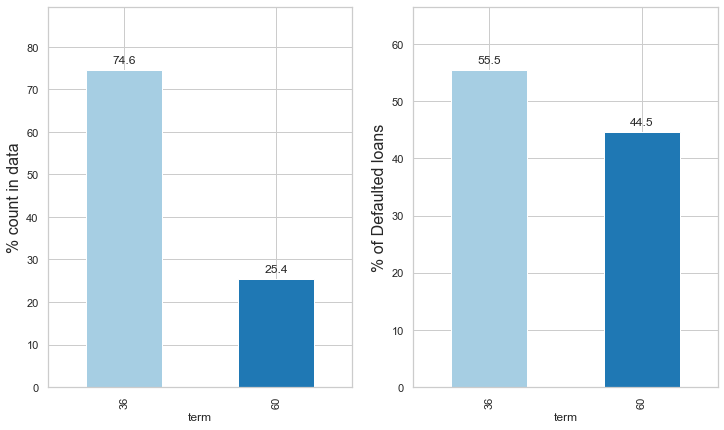

In [72]:
plt.figure(figsize=(12,7));
default_rate_per_var('term');

#### Inference :

- The default rate increases drastically for 60 months term.
- So, **term** is an **important** driving parameter.

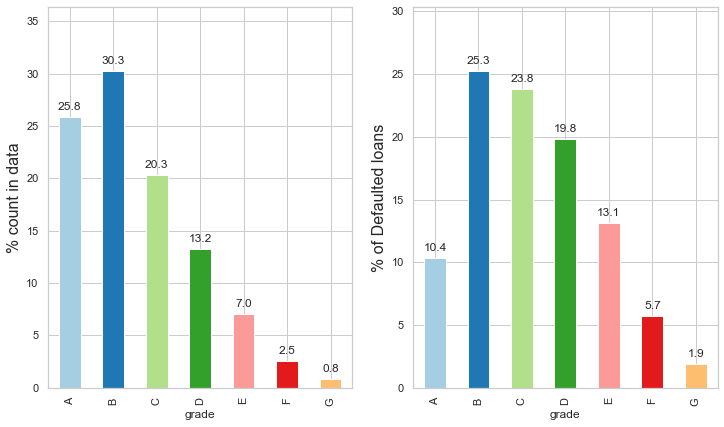

In [73]:
plt.figure(figsize=(12,7));
default_rate_per_var('grade');

#### Inference :

- There is a significant increase in default rate for C,D,E,F,G grades.
- So, **grade** is an **important** driving parameter.

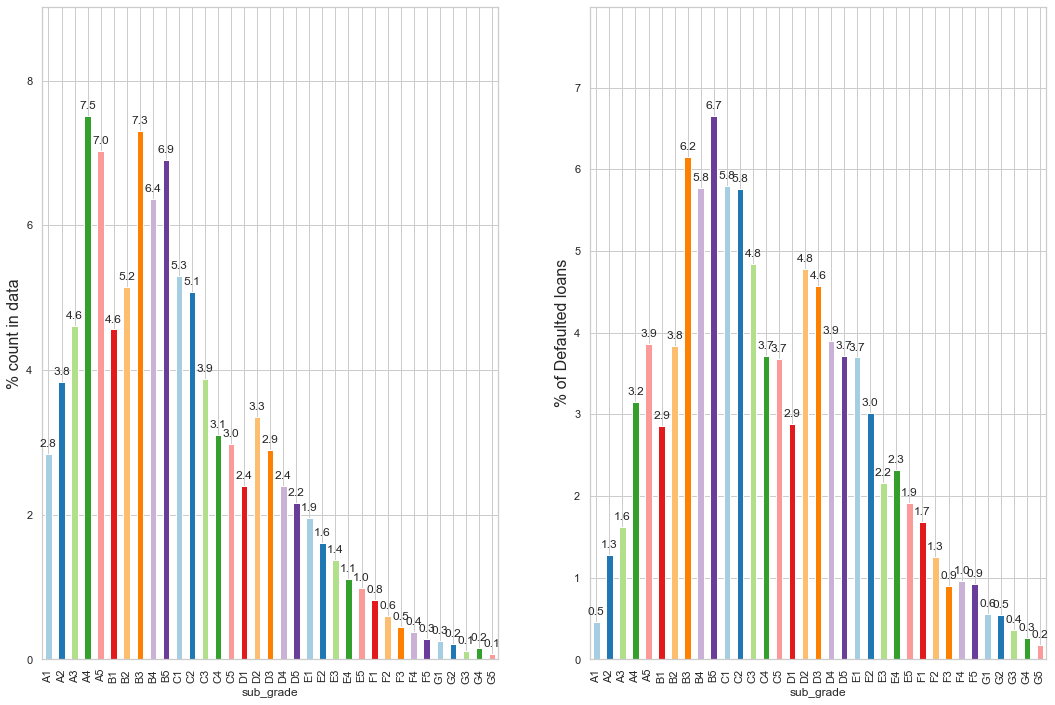

In [74]:
plt.figure(figsize=(18,12));
default_rate_per_var('sub_grade');

#### Inference :

- There is again an increase in default rate for C,D,E,F,G sub_grades.
- So, **sub_grade** is an **important** driving parameter.

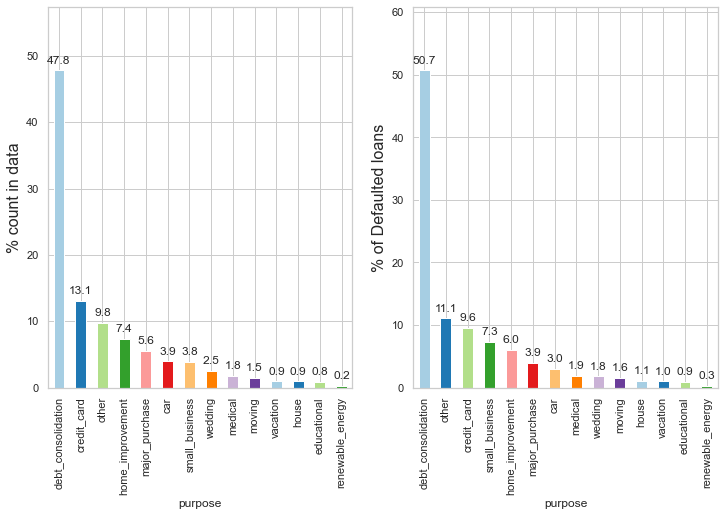

In [75]:
plt.figure(figsize=(12,7));
default_rate_per_var('purpose',sort_flg=False);

#### Inference :

- There is an increase in default rate for debt_consolidation purpose.
- So, **debt_consolidation purpose** is more prone to default.

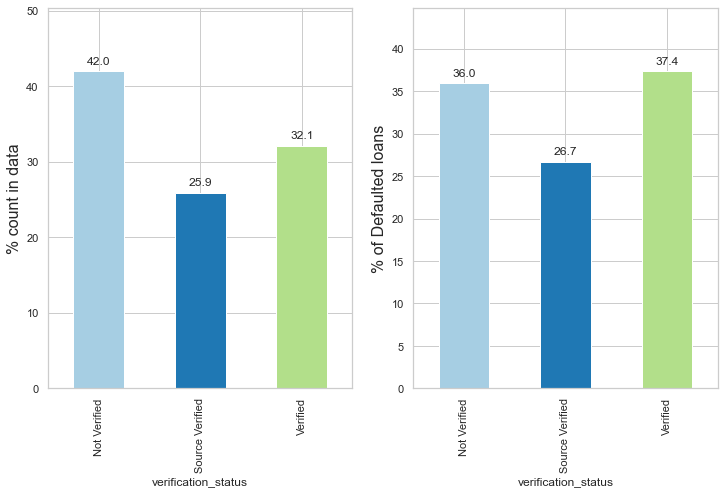

In [76]:
plt.figure(figsize=(12,7));
default_rate_per_var('verification_status');

In [77]:
loan_df.groupby('in_default_flg')['verification_status'].value_counts()

in_default_flg  verification_status
0               Not Verified           13073
                Verified                9513
                Source Verified         7846
1               Verified                1869
                Not Verified            1800
                Source Verified         1335
Name: verification_status, dtype: int64

#### Inference :

- There is no clear increase in default rate for different verification_status.
- So, we wont consider **verification_status**.

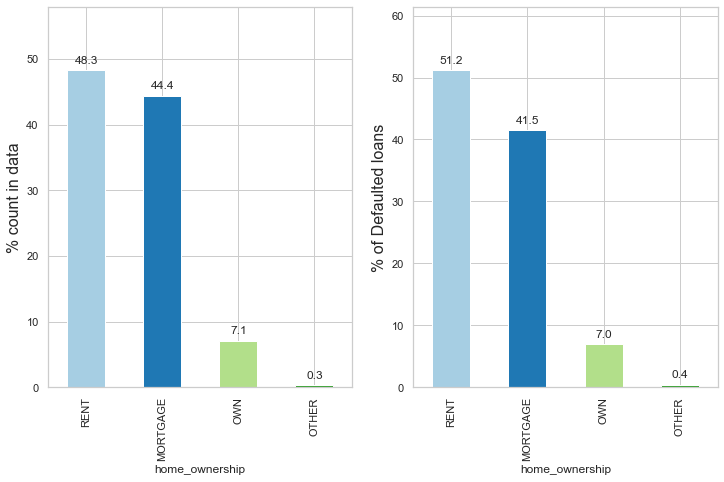

In [78]:
plt.figure(figsize=(12,7));
default_rate_per_var('home_ownership',sort_flg=False);

#### Inference :

- There is no clear increase in default rate for different home ownership status.
- So, we wont consider **home_ownership**.

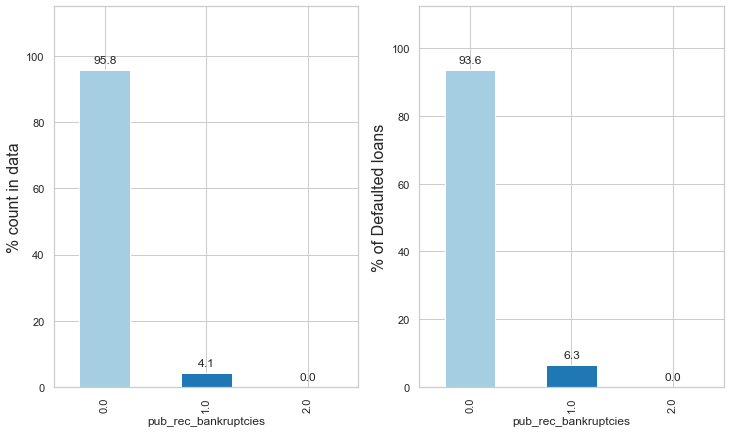

In [79]:
plt.figure(figsize=(12,7));
default_rate_per_var('pub_rec_bankruptcies');

In [80]:
loan_df.groupby('in_default_flg')['pub_rec_bankruptcies'].value_counts()

in_default_flg  pub_rec_bankruptcies
0               0.0                     29276
                1.0                      1153
                2.0                         3
1               0.0                      4685
                1.0                       317
                2.0                         2
Name: pub_rec_bankruptcies, dtype: int64

#### Inference :

- There is no clear increase in default rate for different pub_rec_bankruptcies values.
- So, we wont consider **pub_rec_bankruptcies**.

#### A user-defined function for segmented univariate analysis

In [81]:
def segment_uni(x_axis, xlabel_rotation=0):
    ax = sns.barplot(x = x_axis,  y= 'in_default_flg', hue = 'loan_status', order= sorted(list(set(loan_df[x_axis]))), data = loan_df, estimator=lambda x: len(x) / len(loan_df) * 100 )
    showLabels(ax)
    #plt.title(figure_title)
    plt.xticks(rotation = xlabel_rotation)
    #plt.xlabel(xlabel, labelpad = 15)
    #plt.ylabel(ylabel, labelpad = 10)
    
    #if legend_flag == True:
        #plt.legend(loc = legend)

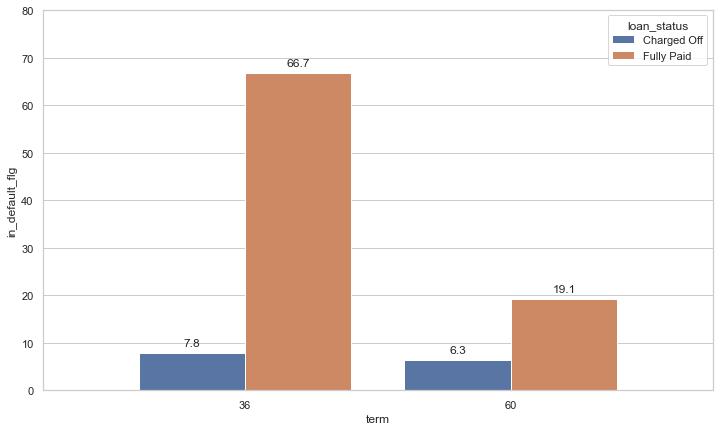

In [82]:
# plt.subplot(1, 2, 1)
# loan_df.groupby(['in_default_flg','term']).size().plot.bar()
# plt.subplot(1, 2, 2)
# loan_df.groupby('in_default_flg')['term'].value_counts().plot.bar()
plt.figure(figsize=(12,7));
segment_uni('term');

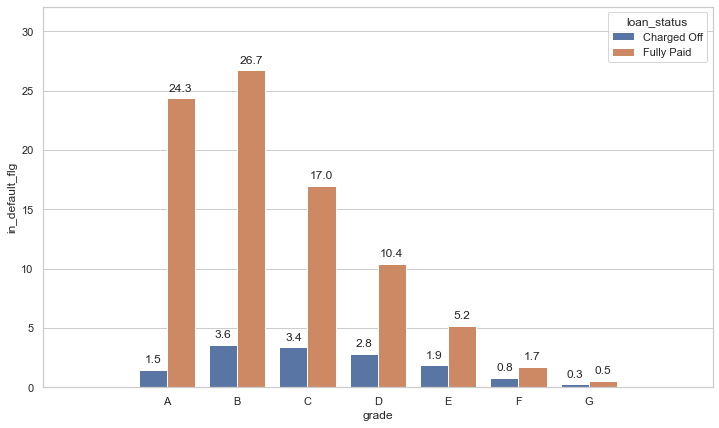

In [83]:
plt.figure(figsize=(12,7));
segment_uni('grade');

#### Inference :

- There is a high difference between the default and non-default rate for better grades like A,B and steeply decreases going towards G.
- Once again, we can infer **grade** as an important parameter.

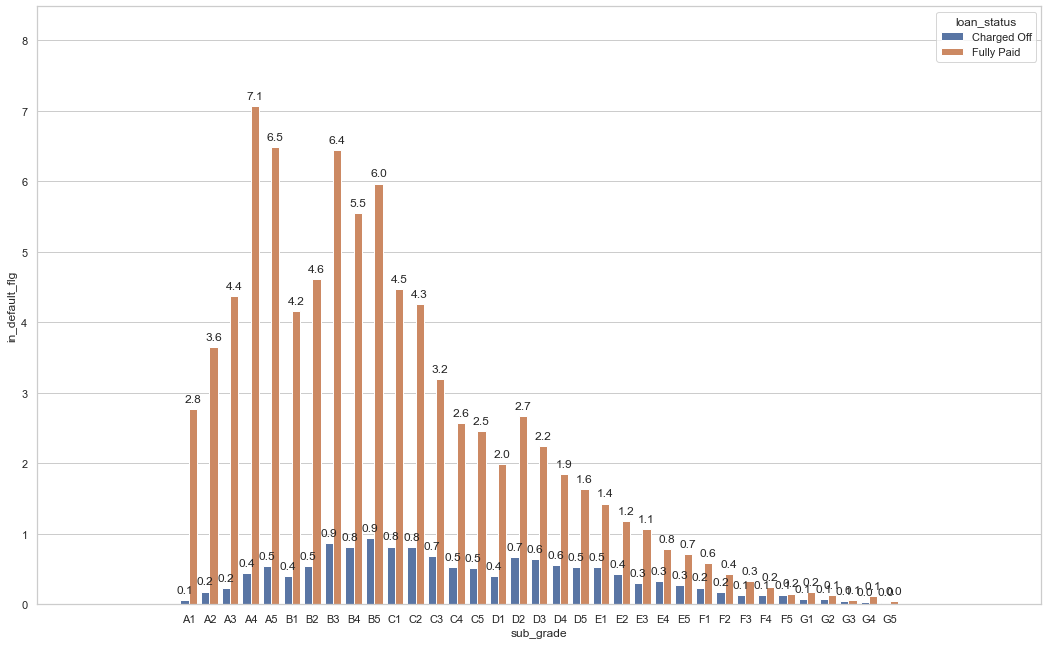

In [84]:
plt.figure(figsize=(18,11));
segment_uni('sub_grade');

#### Inference :

- There is a high difference between the default and non-default rate for better grades like A,B and steeply decreases going towards G.
- Once again, we can infer **sub_grade** as an important parameter.

In [85]:
# plt.figure(figsize=(12,7));
# segment_uni('purpose',90);

In [86]:
# plt.figure(figsize=(12,7));
# segment_uni('verification_status');

In [87]:
# plt.figure(figsize=(12,7));
# segment_uni('pub_rec_bankruptcies');

# Univariate Analysis - Quantitative features

In [88]:
# This user-defined function plots the distribution of target column, and its boxplot against loan_status column
def plot_distribution(var):
    plt.figure(figsize=(17,9))
    plt.subplot(1, 2, 1)
    ax = sns.histplot(data=loan_df, x=var, kde=True)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=var, y= 'loan_status', data=loan_df)
    plt.show()

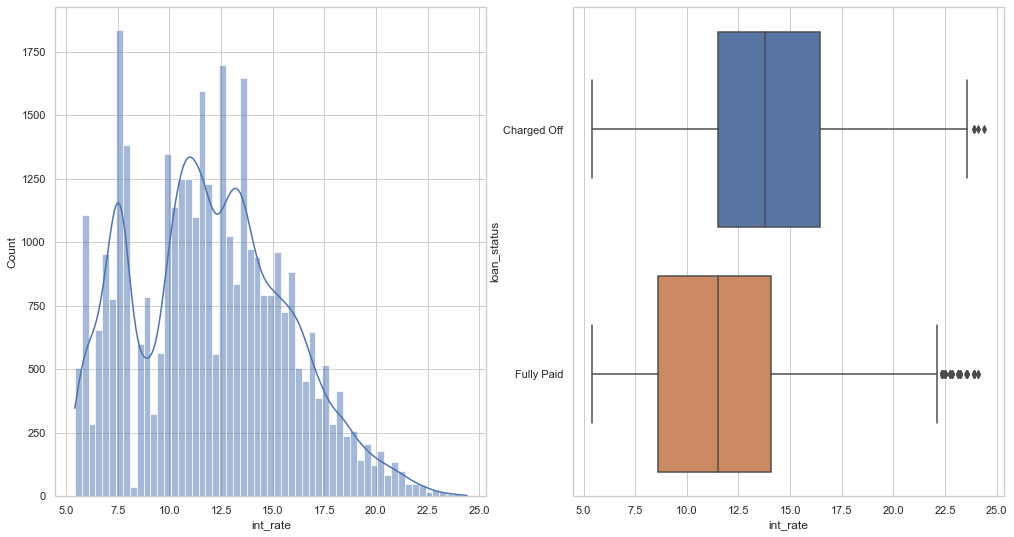

In [89]:
plot_distribution('int_rate')

In [90]:
loan_df.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5004.0,13.930558,3.643227,5.42,11.49,13.79,16.45,24.40
Fully Paid,30432.0,11.667801,3.613915,5.42,8.59,11.49,14.09,24.11


In [91]:
cut_labels_4 = ['low','medium','high']
loan_df['Interest Rate'] = pd.cut(loan_df['int_rate'], bins=np.linspace(loan_df['int_rate'].min(), loan_df['int_rate'].max(), 4), labels=cut_labels_4)
loan_df['Interest Rate'].value_counts()

low       16975
medium    15854
high       2102
Name: Interest Rate, dtype: int64

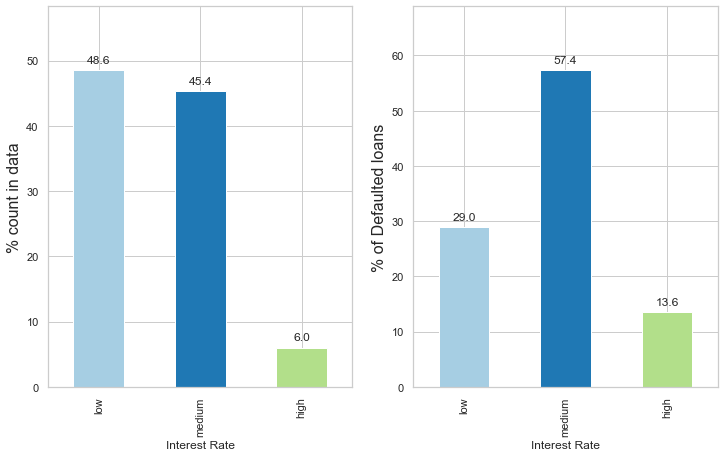

In [92]:
plt.figure(figsize=(12,7));
default_rate_per_var('Interest Rate');

#### Inference :

- For defaulters interest rate in Inter-Quartile range is high compared to non-defaulters.
- So, **int_rate** is an **important** driving parameter.

- Also for low interest rates, the chance of defaulting is less and vice-versa.

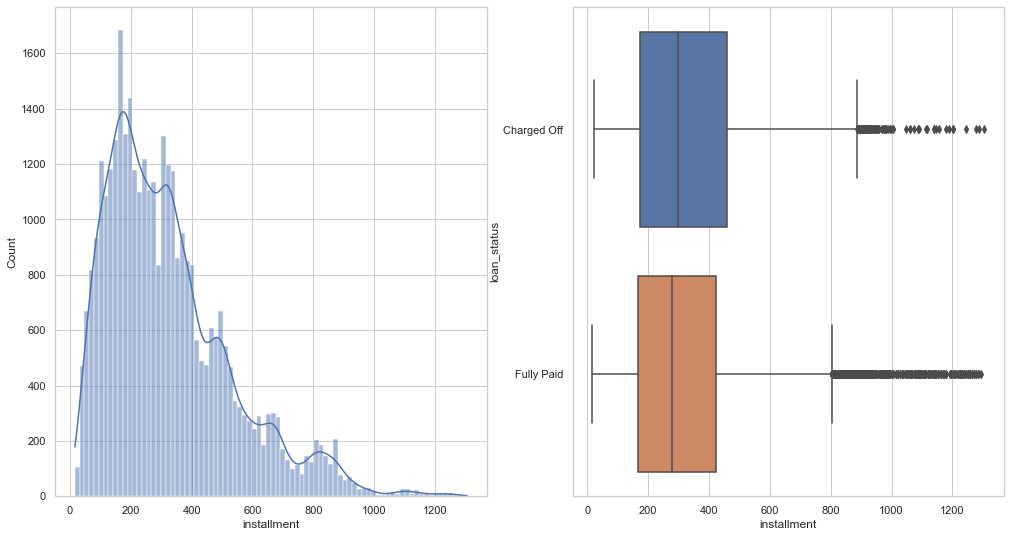

In [93]:
plot_distribution('installment')

#### Inference :

- There is similar quartiles for both the deafult and non-defaulters.
- We wont consider installment.

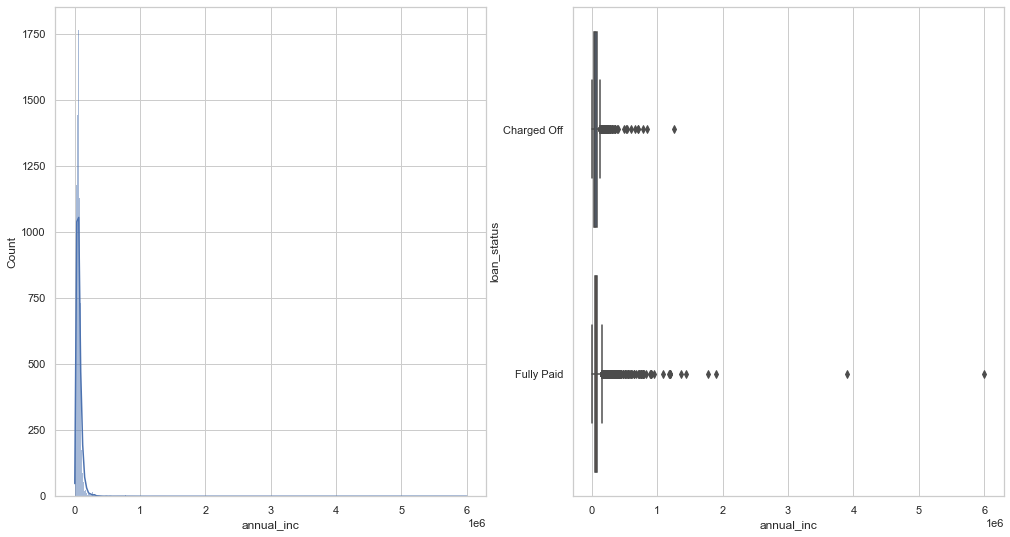

In [94]:
plot_distribution('annual_inc')

There are outliers in the income variable.
This should be cleaned.

#### Removing the outliers

In [95]:
loan_df_inc = loan_df[np.abs(loan_df.annual_inc-loan_df.annual_inc.mean()) <= (3*loan_df.annual_inc.std())].copy()

In [96]:
loan_df_inc.shape

(35191, 28)

In [97]:
loan_df_inc['Annual Income'] = pd.cut(loan_df_inc['annual_inc'], bins=5)
loan_df_inc['Annual Income'].value_counts()

(3744.0, 55200.0]       16375
(55200.0, 106400.0]     14690
(106400.0, 157600.0]     3183
(157600.0, 208800.0]      743
(208800.0, 260000.0]      200
Name: Annual Income, dtype: int64

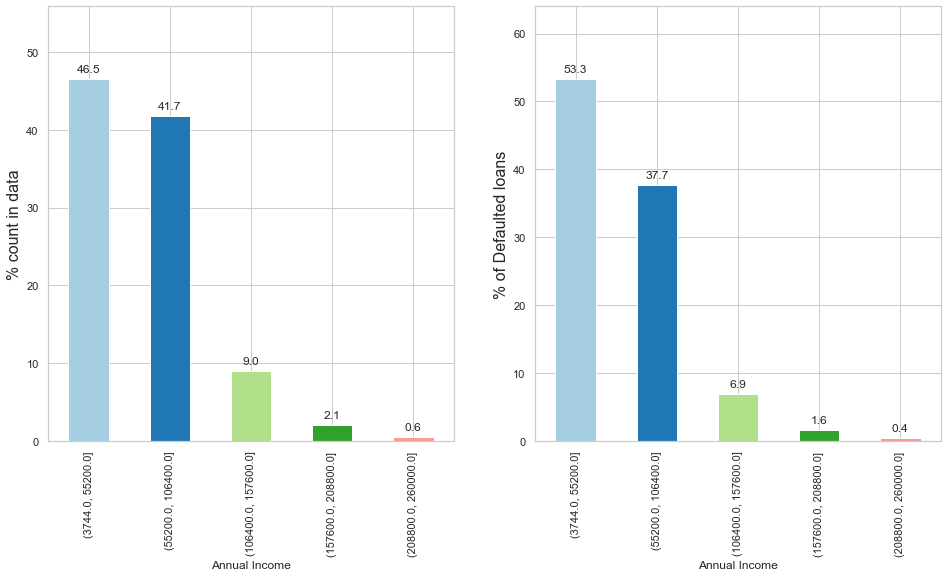

In [98]:
plt.figure(figsize=(16,8));
default_rate_per_var('Annual Income', df=loan_df_inc);

#### Inference :

- The % of defaulted loans is higher for lower to mid salary range.
- So, **Annual Income** is an important factor.

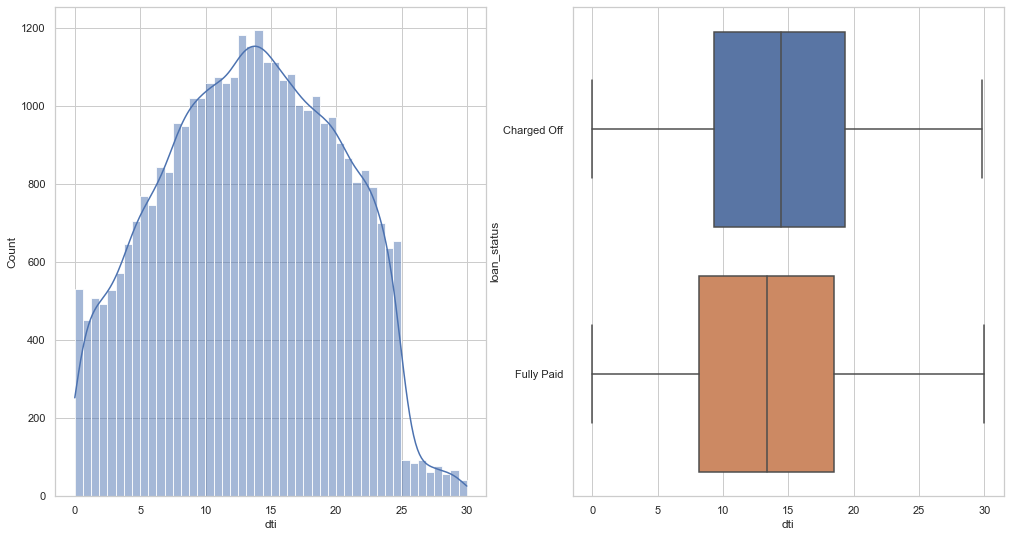

In [99]:
plot_distribution('dti')

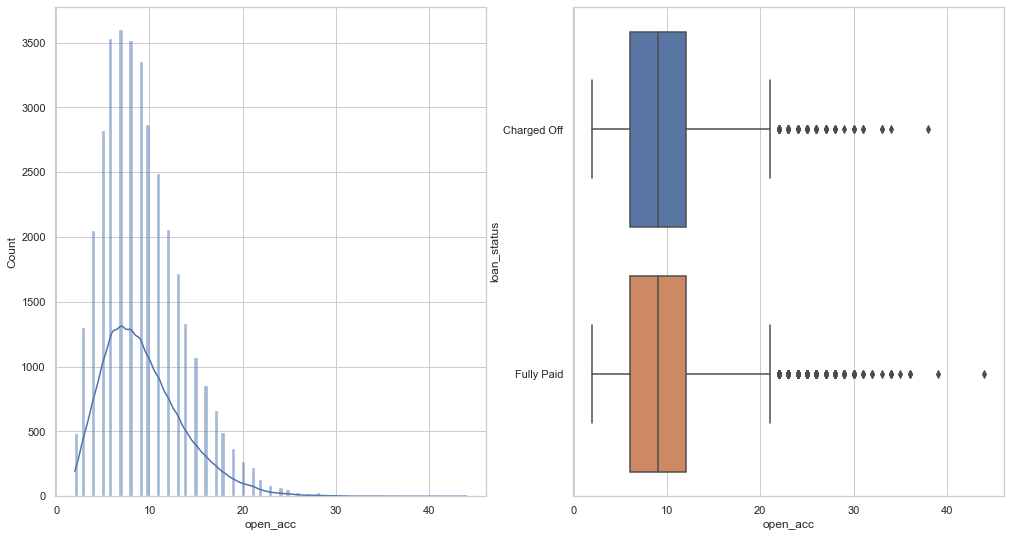

In [100]:
plot_distribution('open_acc')

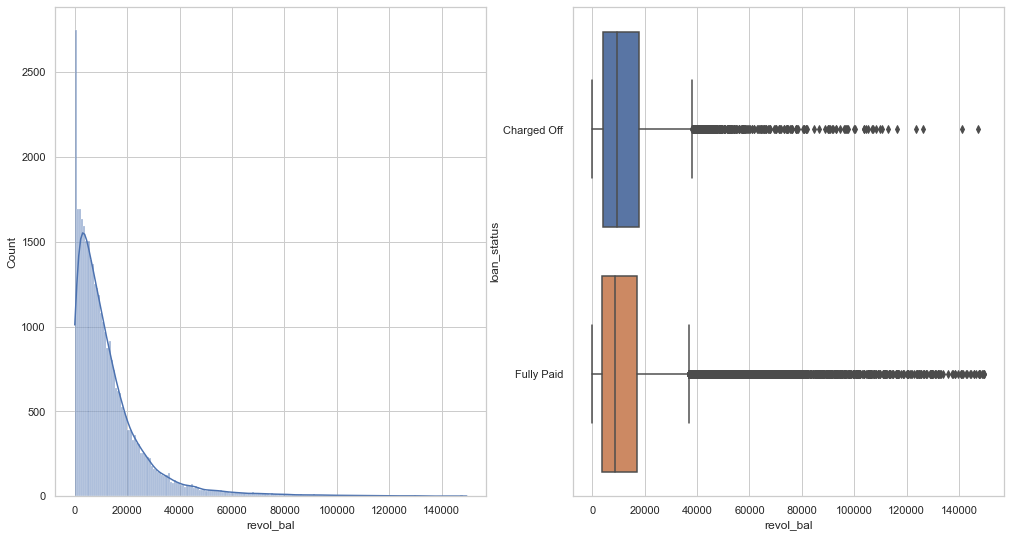

In [101]:
plot_distribution('revol_bal')

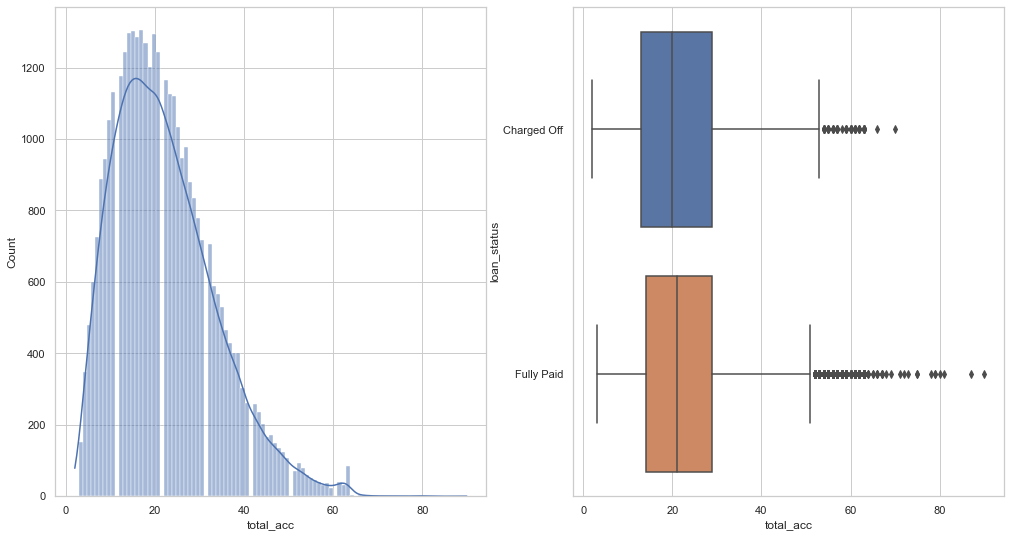

In [102]:
plot_distribution('total_acc')

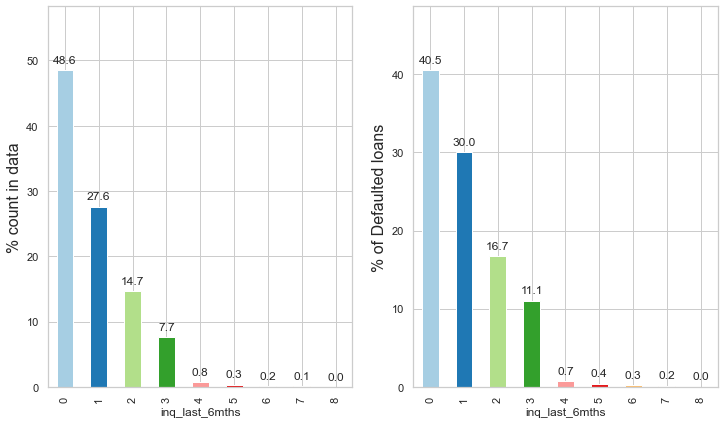

In [103]:
plt.figure(figsize=(12,7));
default_rate_per_var('inq_last_6mths');

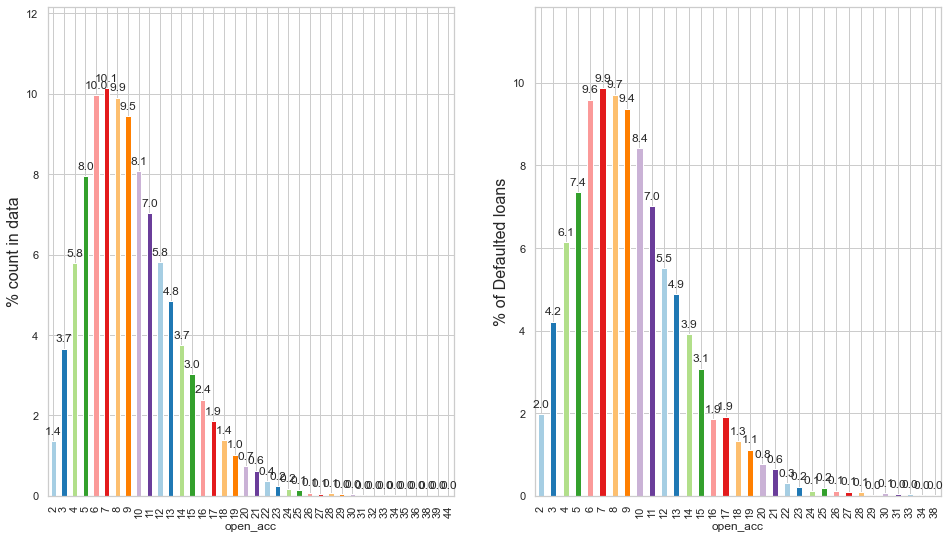

In [104]:
plt.figure(figsize=(16,9));
default_rate_per_var('open_acc');

In [105]:
loan_df['emp_length'].value_counts().sort_index()

0.0     3986
1.0     2969
2.0     4089
3.0     3840
4.0     3214
5.0     3054
6.0     2064
7.0     1639
8.0     1364
9.0     1180
10.0    8037
Name: emp_length, dtype: int64

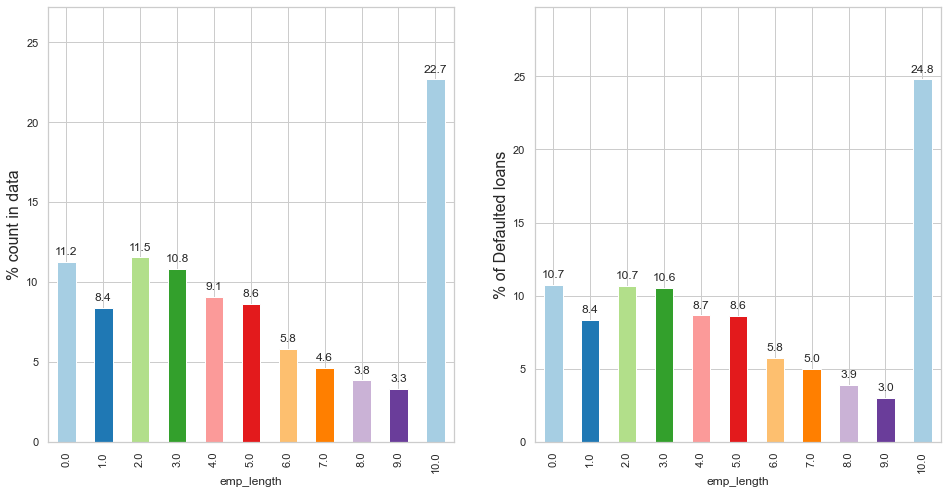

In [106]:
plt.figure(figsize=(16,8));
default_rate_per_var('emp_length');

In [107]:
loan_df['revol_util'].describe()

count    35436.000000
mean        49.140218
std         28.229066
min          0.000000
25%         25.900000
50%         49.700000
75%         72.600000
max         99.900000
Name: revol_util, dtype: float64

In [108]:
cut_labels_4 = ['low','medium','high','very high']
loan_df['Revolving Utilization'] = pd.cut(loan_df['revol_util'], bins=4, labels=cut_labels_4)
loan_df['Revolving Utilization'].value_counts().sort_index()

low          8546
medium       9294
high         9583
very high    8013
Name: Revolving Utilization, dtype: int64

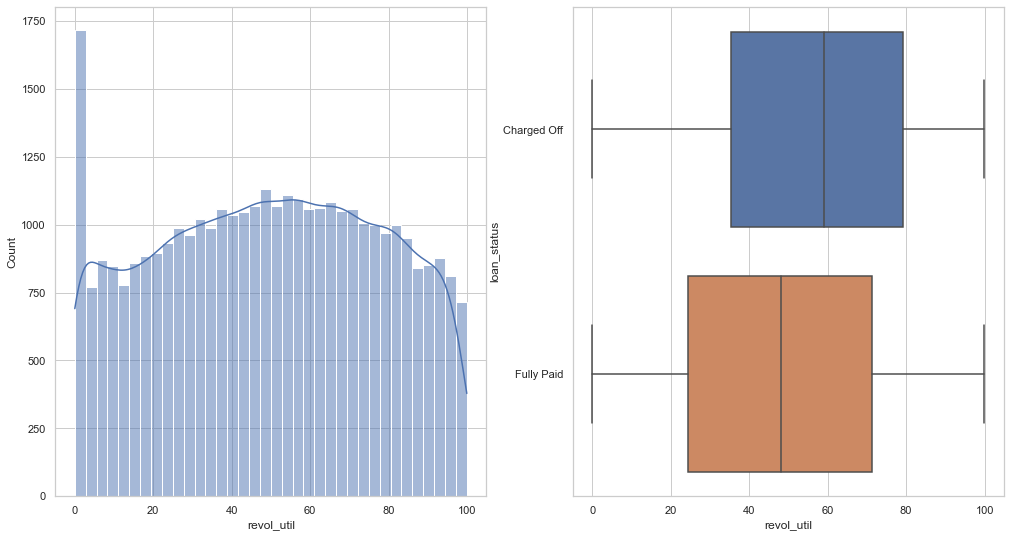

In [109]:
plot_distribution('revol_util')

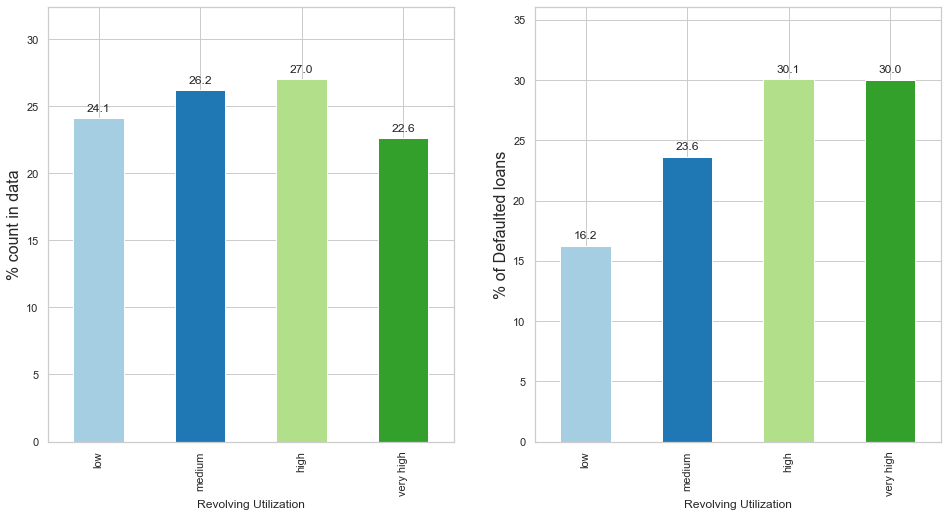

In [110]:
plt.figure(figsize=(16,8));
default_rate_per_var('Revolving Utilization');

#### Inference :

- The high and very high revolving utilization cases are more in case of defaulters.
- Also the median is higher for defaulters.
- So **Revolving utilization** is an important factor.

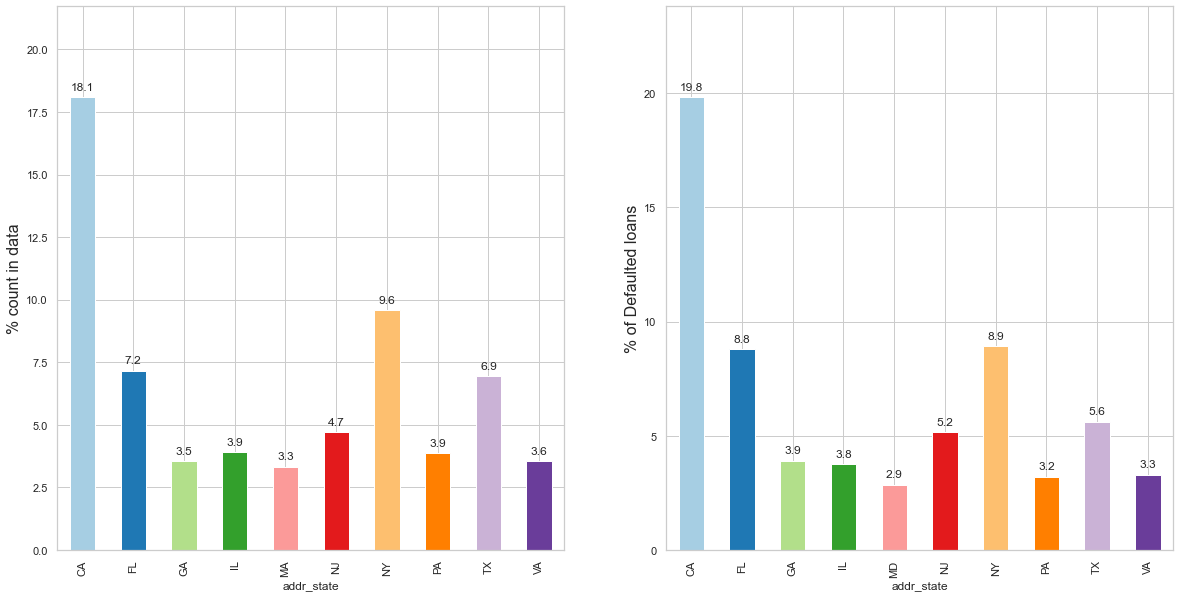

In [111]:
# loan_df.addr_state.value_counts(normalize=True).head(10)*100
plt.figure(figsize=(20,10));
default_rate_per_var('addr_state', head=10);

#### Inference :

- The distribution is for defaulter does not vary much with the entire portfolio.
- So we will not consider **addr_state**

array([2068, 2067, 2065, 2063, 2066, 2062, 2056, 2046, 2050, 2064, 2054],
      dtype=int64)

<AxesSubplot:xlabel='earliest_cr_line_year', ylabel='Count'>

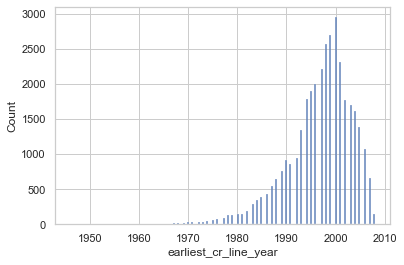

In [112]:
loan_df['earliest_cr_line_year'] = loan_df['earliest_cr_line'].dt.year
loan_df.loc[loan_df['earliest_cr_line_year'] > 2011, 'earliest_cr_line_year' ].unique()
loan_df.loc[loan_df['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = loan_df['earliest_cr_line_year'] - 100
sns.histplot(loan_df['earliest_cr_line_year'])

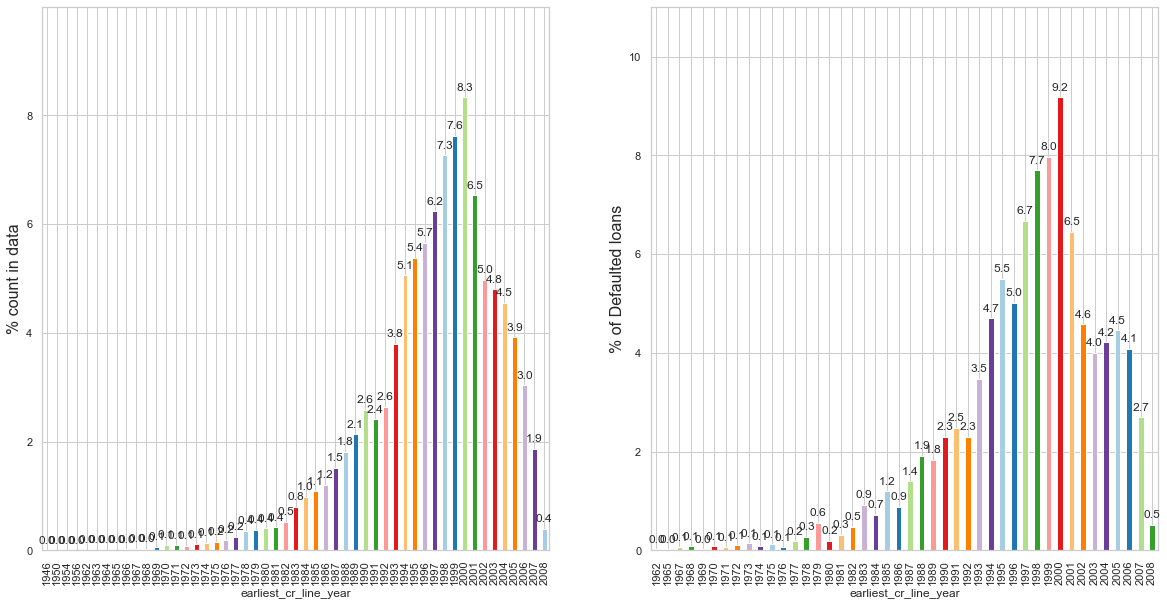

In [113]:
plt.figure(figsize=(20,10));
default_rate_per_var('earliest_cr_line_year');

#### Inference :

- The distribution is for defaulter does not vary much with the entire portfolio.
- So we will not consider **credit line year**

# Bivariate Analysis

In [114]:
def bivariate(x_axis, y_axis, xlabel_rotation=0, legend_flag=False, est='mean'):
    if est == 'count_pct':
        ax = sns.barplot(x = x_axis,  y=y_axis, hue = 'loan_status', order= sorted(list(set(loan_df[x_axis]))), data = loan_df, estimator=lambda x: len(x) / len(loan_df) * 100 )
    else:
        ax = sns.barplot(x = x_axis,  y=y_axis, hue = 'loan_status', order= sorted(list(set(loan_df[x_axis]))),data = loan_df, estimator=np.mean )
    
    #plt.title(figure_title)
    plt.xticks(rotation = xlabel_rotation)
    #plt.xlabel(xlabel, labelpad = 15)
    #plt.ylabel(ylabel, labelpad = 10)
    
    if legend_flag:
        plt.legend(loc = legend)

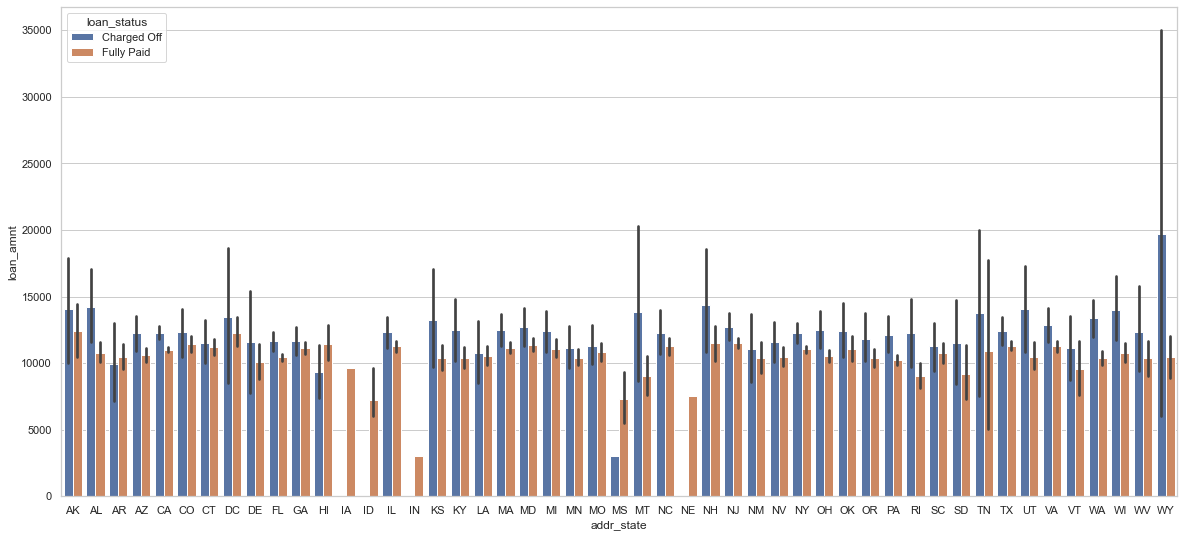

In [115]:
plt.figure(figsize=(20,9));
bivariate(x_axis='addr_state', y_axis='loan_amnt' );

- State WY: Wyoming has the the highest average loan amount that was charged off. Can be investigated.

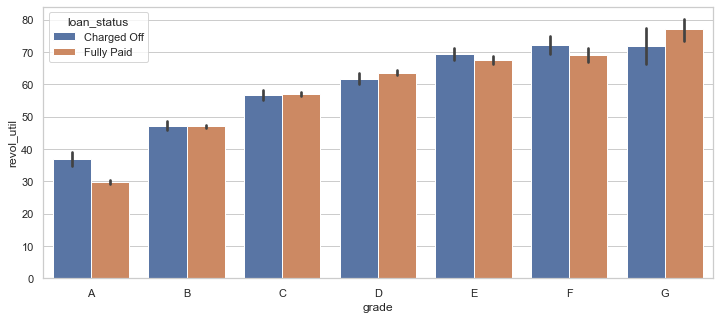

In [116]:
plt.figure(figsize=(12,5));
bivariate(x_axis='grade', y_axis='revol_util' );


#### Inference :

- The revolving utilization increases with the loans with lower grades.
- So **Revolving utilization** is an important factor.

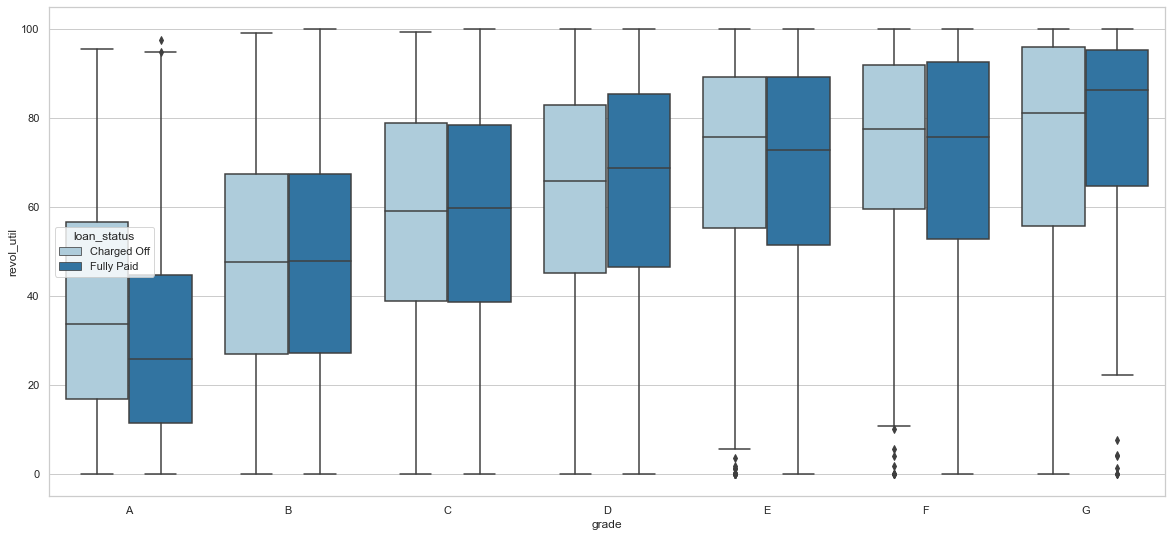

In [117]:
plt.figure(figsize=(20,9))
sns.boxplot(x="grade", y="revol_util", hue="loan_status", data=loan_df, order= sorted(list(set(loan_df['grade']))),palette="Paired");

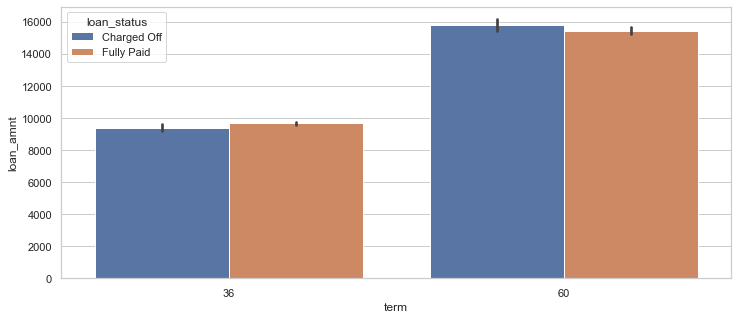

In [118]:
plt.figure(figsize=(12,5));
bivariate(x_axis='term', y_axis='loan_amnt' );

- The assumption made during univariate analysis is more evident with this plot. Higher loan amount are associated with longer terms and see higher Charge Offs.

In [119]:
# 5.14 Define Correlation

# Correlation of loan_status = Charged Off
defaulted_df = loan_df[loan_df.loan_status == 'Charged Off'].corr().drop(labels = {'in_default_flg'})

defaulted_df.dropna(axis = 1, how = 'all', inplace = True)

defaulted_df

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,earliest_cr_line_year
loan_amnt,1.000000,0.395263,0.348403,0.924712,0.191114,0.345489,0.070127,-0.028221,0.008013,0.174957,-0.042716,0.320329,0.047319,0.284155,-0.019272,-0.210991
term,0.395263,1.000000,0.453891,0.139136,0.127940,0.084220,0.063541,-0.004654,-0.001970,0.051883,-0.001221,0.074556,0.037132,0.108795,0.027734,-0.085492
int_rate,0.348403,0.453891,1.000000,0.328722,0.036516,0.136283,0.041428,0.124991,0.063285,0.038967,0.084516,0.078279,0.375179,-0.013326,0.080776,0.089624
installment,0.924712,0.139136,0.328722,1.000000,0.167178,0.352701,0.050127,-0.012916,0.017889,0.171712,-0.037243,0.306522,0.080371,0.255922,-0.020725,-0.175608
emp_length,0.191114,0.127940,0.036516,0.167178,1.000000,0.134978,0.052752,0.013881,0.011919,0.097388,0.061531,0.143128,0.030929,0.179509,0.052336,-0.241785
annual_inc,0.345489,0.084220,0.136283,0.352701,0.134978,1.000000,-0.079956,0.030354,0.033479,0.209386,0.000481,0.365717,0.076622,0.288324,0.006960,-0.226622
dti,0.070127,0.063541,0.041428,0.050127,0.052752,-0.079956,1.000000,-0.065453,-0.020892,0.303556,-0.000346,0.252371,0.231385,0.275562,0.014956,-0.082368
delinq_2yrs,-0.028221,-0.004654,0.124991,-0.012916,0.013881,0.030354,-0.065453,1.000000,-0.010499,-0.015245,0.009393,-0.079425,-0.096898,0.065384,0.010183,-0.041982
inq_last_6mths,0.008013,-0.001970,0.063285,0.017889,0.011919,0.033479,-0.020892,-0.010499,1.000000,0.078768,0.015261,-0.009511,-0.130887,0.111849,0.011543,-0.021635
open_acc,0.174957,0.051883,0.038967,0.171712,0.097388,0.209386,0.303556,-0.015245,0.078768,1.000000,0.052466,0.328383,-0.048688,0.683415,0.065374,-0.222688


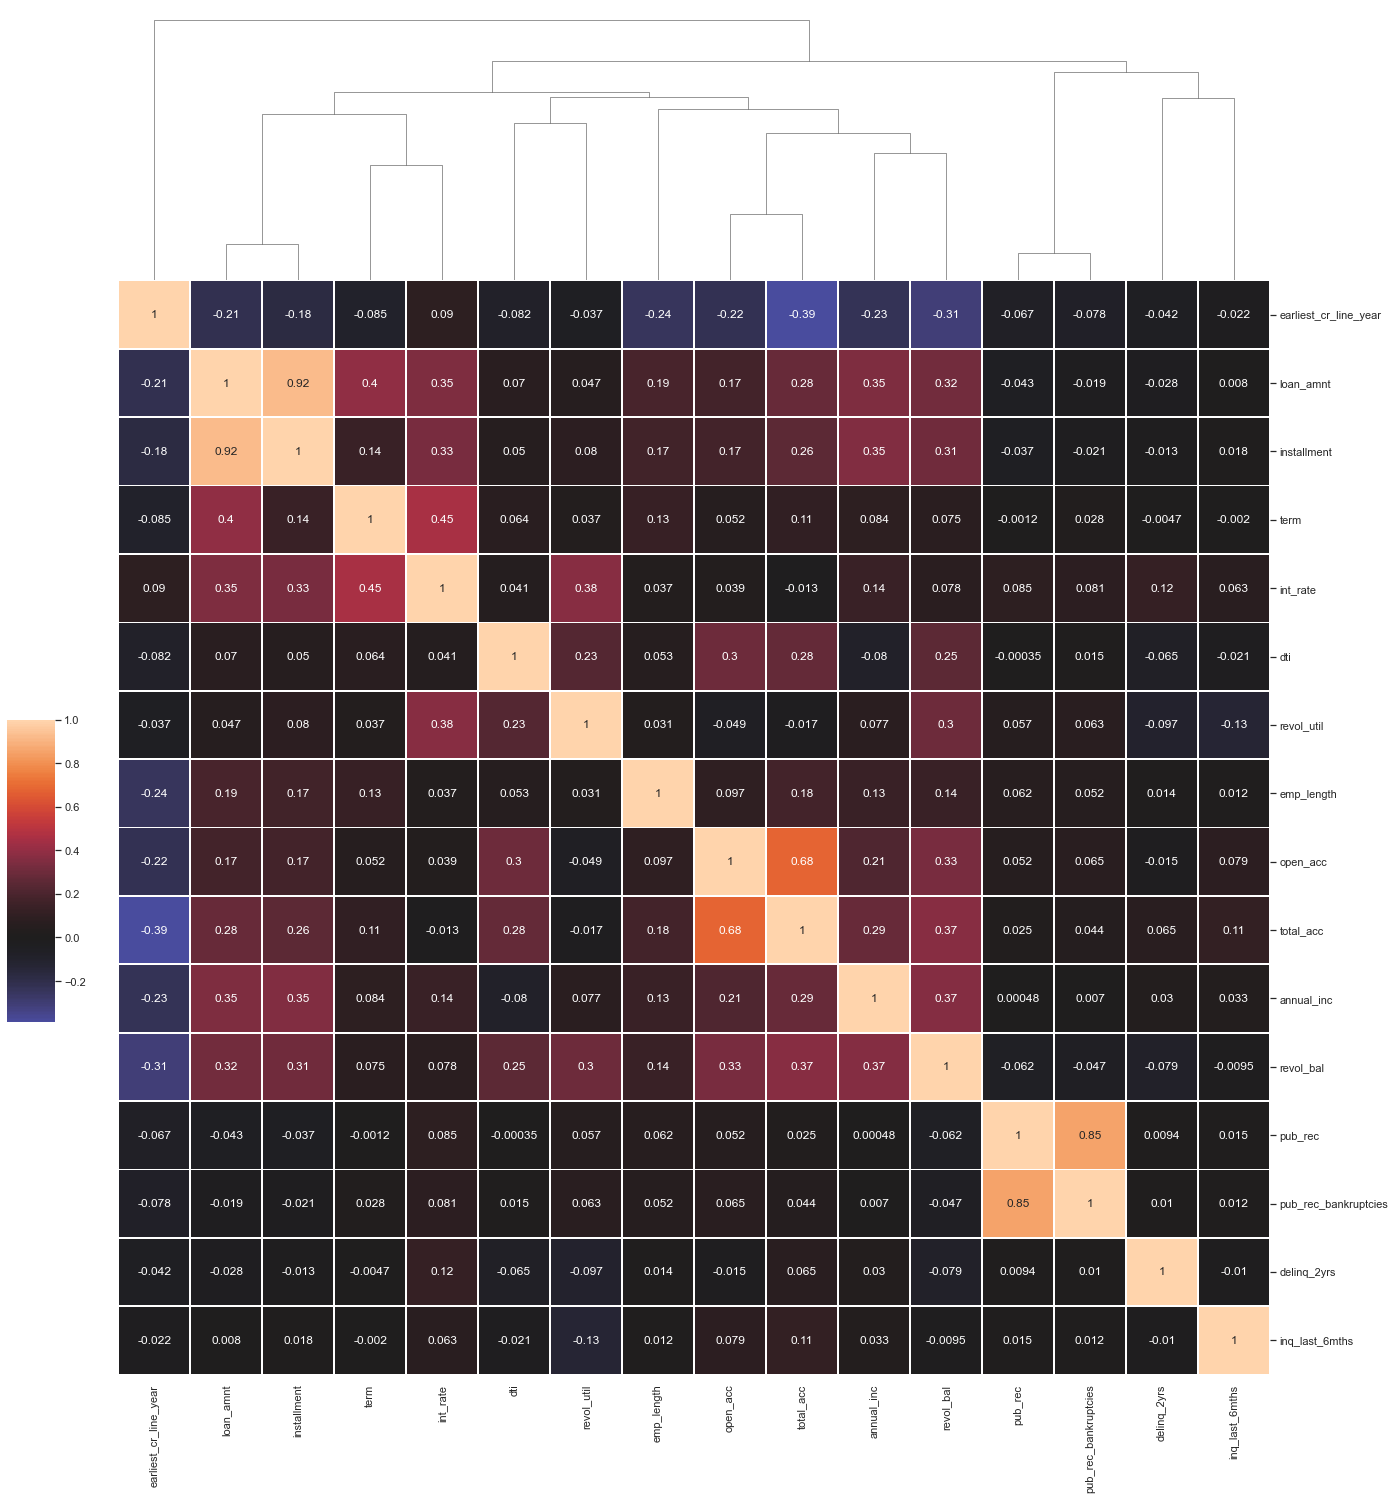

In [120]:
ax = sns.clustermap(defaulted_df, annot=True, center=0, linewidths=.75, figsize=(22,21), cbar_pos=(.12, .32, .03, .2),);
ax.ax_row_dendrogram.remove()

## Conclusion:

#### Major variables to consider for loan prediction:

        1. Grade & Sub-grade
        2. Interest Rate 
        3. Term
        4. Revolving Utilisation
        5. Purpose
        
#### Purpose - Debt Consolidation
#### State - WY- Wyoming
#### Term - 60 months
#### Grade - D,E,F,G are riskier along with its sub grades.
#### Interest rate - On higher side